1. Import the raw data set into a Pandas DataFrame.

In [2]:
import pandas as pd

df = pd.read_csv('Cars93.csv')

2. Clean the data and remove missing values. Drop any column that is not categorical or numeric. Let our target variable be MPG.highway again. Separate the independent variables from the dependent variable.

In [3]:
df.drop(['Rear.seat.room','Luggage.room','Model','Unnamed: 0','Make'], inplace=True,axis=1)
X = pd.DataFrame(df)
X.drop('MPG.highway',inplace=True,axis=1)
y =pd.DataFrame(df['MPG.highway'])

3. Generate dummy variables for the categorical features.

In [4]:
X = pd.get_dummies(X)
X.drop(['Origin_non-USA','Man.trans.avail_Yes','Cylinders_rotary','Manufacturer_Acura','Type_Small','AirBags_None','DriveTrain_Front'], inplace=True,axis=1)

4. Create a training set that's 75% of your data set and a complementary test set with the remaining 25%. Specify random_state=0.

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

5. Train the model using the LinearRegression class. Leave all parameters at their default values.

In [6]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train,y_train)

6. Use your model to generate predictions on the test set, then create two scatter plots: one with predicted values against actual values, and another with residuals against predicted values. Print the coefficient of determination of the model with the .score() method.

0.42345159746653005


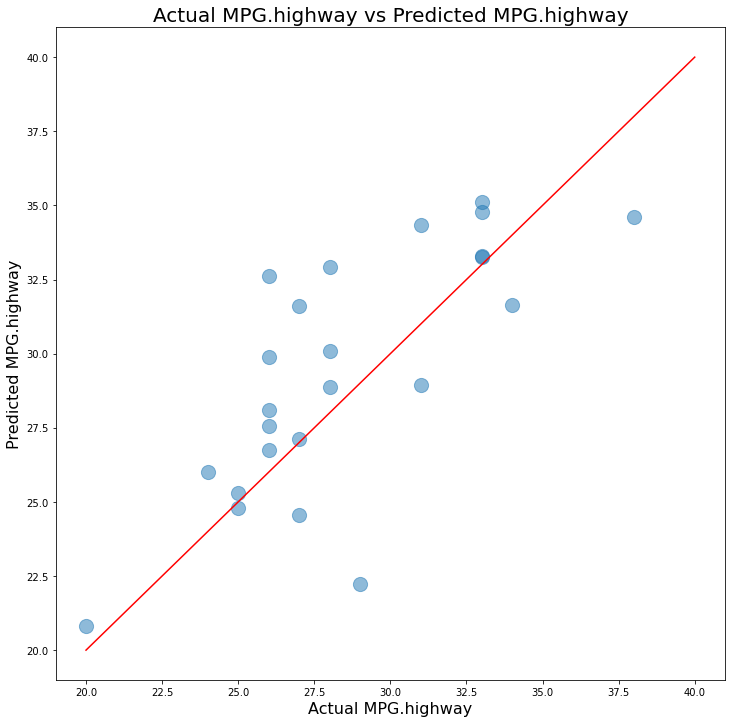

In [7]:
y_predicted = reg.predict(X_test)
print(reg.score(X_test,y_test))
residuals = y_test - y_predicted
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(12,12))
plt.scatter(x=y_test,y=y_predicted,s=200,alpha=0.5)
plt.plot([20,40],[20,40], color='red')
plt.title('Actual MPG.highway vs Predicted MPG.highway', fontsize=20)
plt.xlabel('Actual MPG.highway', fontsize = 16)
plt.ylabel('Predicted MPG.highway', fontsize = 16)
plt.show()

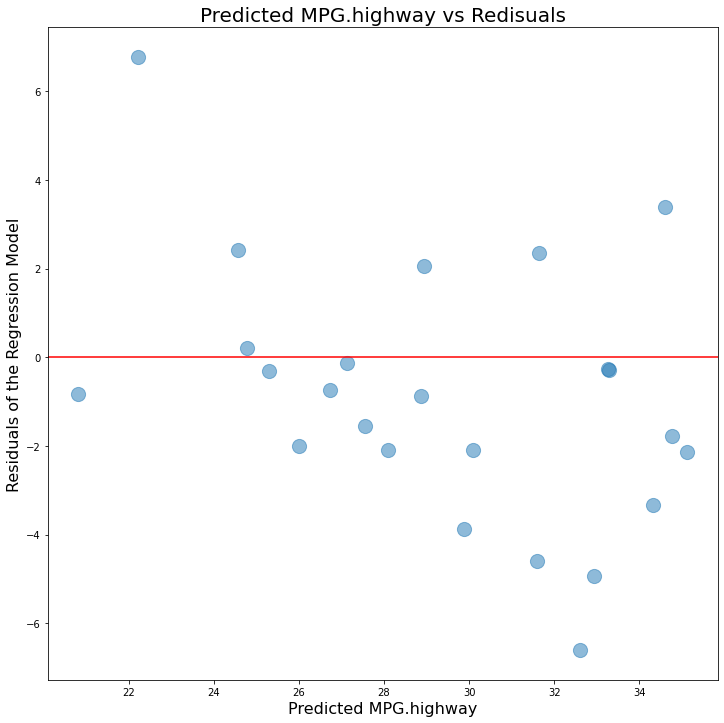

In [8]:
plt.figure(figsize=(12,12))
plt.scatter(x=y_predicted,y=residuals,s=200,alpha=0.5)
plt.axhline(y=0, color='r',linestyle='-')
plt.title('Predicted MPG.highway vs Redisuals', fontsize=20)
plt.xlabel('Predicted MPG.highway', fontsize = 16)
plt.ylabel('Residuals of the Regression Model', fontsize = 16)
plt.show()

7. Print out the actual model in equation form, i.e., y = b + c1x1 + c2x2 + c3x3 + ....

In [11]:
start = f'y = {float(reg.intercept_)} '
for i in range(len(reg.coef_[0])):
    start = start + f'+ {reg.coef_[0][i]}{X.columns[i]} '
start

'y = -28.25317215278835 + 5.81578911701864Min.Price + -11.78125243114826Price + 5.909242341142605Max.Price + 0.6354661512056452MPG.city + -1.1497903825252727EngineSize + -0.03155505281052795Horsepower + 0.001263226758453584RPM + -0.0008464540030903578Rev.per.mile + -0.18318621789768486Fuel.tank.capacity + -2.270312315804442Passengers + 0.10415838286759982Length + 0.07002375260074079Wheelbase + 0.5521246377133342Width + 0.12441697064330248Turn.circle + -0.002200549841968158Weight + 3.405664321243348Manufacturer_Audi + 13.957828580654422Manufacturer_BMW + 4.576396374312792Manufacturer_Buick + -0.9740768019573316Manufacturer_Cadillac + 1.6430288958673431Manufacturer_Chevrolet + -3.6387822322889622Manufacturer_Chrylser + -0.8881914124122823Manufacturer_Chrysler + -0.1844714490571091Manufacturer_Dodge + -2.859152531342207Manufacturer_Eagle + -1.0080277019183865Manufacturer_Ford + 3.67763192406765Manufacturer_Geo + 1.0888581212325192Manufacturer_Honda + 1.401439689483586Manufacturer_Hyundai 